
<h1 align=center> Calculus: Lagrange Multiplier</h1>



This course is developed by Dr. Mohamed Gabr (gbrbreen2@gmail.com) as an introduction to mathematics for AI. The course focuses on using Python for Calculus using Sympy.

# Newton-Raphson method

In this module, we'll start to use the calculus we've done and put it together with vectors in order to start solving equations. In this first video, we'll look at a nice simple case where we just need to find the gradient, or the derivative in order to solve an equation using what's called the Newton-Raphson method. Now, say we've got that distribution of heights again with a mean, an average, mu and width sigma, and we want to fit an equation to that distribution.

So, we don't have to after we've fitted it bother about carrying around all the data points, we just have a model with two parameters; a mean and a width. And we can do everything using just the model. And that would be loads faster simpler, I would let us make predictions and so on. So, it would be much, much nicer, but how do we find the right parameters for the model? How do we find the best mu and sigma we can? What we're going to do is, we're going to find some expression for how well the model fits the data, and then look at how that goodness of fit varies, as the fitting parameters mu and sigma vary. So, we're trying to solve an equation where the fitting parameters are variables in the equation.

http://danielhomola.com/2016/02/09/newtons-method-with-10-lines-of-python/

Now, say that I don't know what the equation looks like, I'm blind and I haven't got enough computer resources to graph out the values at every point. Or more likely, in reality, say the function exists in so many dimensions that I can't visualise it at all. But say I only need to find the solution to the equation where y equals 0. 

y=0

So, where x**3-2*x+2= 0.

So, using Newton-Raphson method, we select a point on x axis then we evaluate the value of the function at x=-2 then calculate the gradient/ differenetiation of the function at this point.

In [2]:
# let us assume that there is a line with this equation :x**3-2*x+2 
from sympy import *
x=Symbol('x')
f=Symbol('f')
f=x**3-2*x+2
init_printing()

# evaluate the value of the function at x=-2
print(f.subs(x,-2))

#calculate the gradient
print(diff(f,x))

# evaluate the gradient at x=-2
print(diff(f,x).subs(x,-2))

-2
3*x**2 - 2
10


In [3]:
# By extending the gradient line, it will intersect with x-axis in a value x= something. We use evaluate the function again at
# x with the new value then calculate the gradient of the function at this point.
# So, let us say that the first point is called xi so this new one is called xi+1.So,
# f(xi+1)= f(xi) - f(xi)/f'(xi) ===> f(xi+1)= -2 - -2/10 = -1.8
# then we repeat the process as shown in the table: https://www.youtube.com/watch?v=pAgxXSBecmA&index=31&list=PL2jykFOD1AWaL4_-bdidPfIWe765jOgfL

print(f.subs(x,-1.8))
print(diff(f,x).subs(x,-1.8))

-0.232000000000001
7.72000000000000


Then we repeat again and again (iteratively) till we reach the intercept y=0 or the nearest to zero as needed (when x=-1.769)

Now, there are some things that can go wrong sometimes with this method. So, let's briefly look at those. Say I started off with a guess of x equals zero, which evaluates y equals two. When I find the gradient for that and extrapolate it, that takes me away from a solution to the other side of the turning point. It gives me a new guess that x equals one. When I evaluate that, then I get a value for y at x equals one of one. When I find the gradient and extrapolate back, then my new estimate lands me back at x equals zero, which is where I begun. So, I have a problem. I seem to have magically landed in a closed loop where my estimate just cycles back between x equals nought and x equals 1. I never get close. I never even go anywhere near to the solution of x equals minus 1.769. There's another problem, which is that if I'm close to a turning point, this bottom here,to a minimum point or a maximum point, then because my gradient will be very small, when I divide by the gradient in the Newton-Raphson equation here, my next estimate will tend to be zapping off to some crazy value, and therefore it won't converge you see, it will dive off somewhere.

Those are the problems. So, that's the Newton-Raphson method. We iterate to a solution, to an equation by each time making and new estimate from a solution using the gradient to extrapolate towards the solution, then going again, and again, and again.Most of the time, this works really well as a means to step towards a solution. 

# Gradient Descent

Be careful that directional derivative of a function is a scalar while gradient is a vector.For a function u= f(x,y) the partial derivative wrt x gives the rate of change of f in the direction of x. Like the derivative, the gradient represents the slope of the tangent of the graph of the function. More precisely, the gradient points in the direction of the greatest rate of increase of the function, and its magnitude is the slope of the graph in that direction.

Gradient/ Grad is the most owesome vector as it is the one that combines calculus and linear algebra together the gradient is a way of packing together all the partial derivatives information of a function

So the gradient puts the partial derivative of x and the partial derivative of y, in a function of x and y,  in a vector ===> 

nablef(x,y)=vector [partial derivative of x, partial derivative of y]
note that the vector can be derivatives of x, y , z , ....etc depending on the number of variables (n-dimentional)

Gradient vector is the direction of steepest ascent (to walk uphill of the graph as fast as you can if you are a mountain climber) ==أشد ميل للصعود لأعلى
    
https://www.youtube.com/watch?v=_-02ze7tf08&list=PLSQl0a2vh4HC5feHa6Rc5c0wbRTx56nF7&index=20

https://www.khanacademy.org/math/multivariable-calculus/multivariable-derivatives/gradient-and-directional-derivatives/v/gradient

http://archives.math.utk.edu/ICTCM/VOL10/C009/paper.html

https://moodle.capilanou.ca/mod/book/view.php?id=328667&chapterid=1401

https://www.jeffreythompson.org/blog/2014/01/01/gradient-vector/

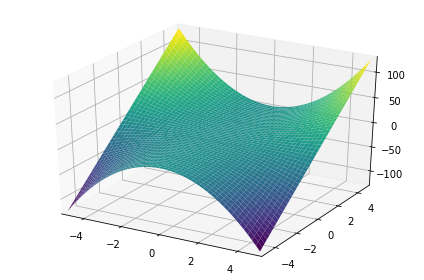

Matrix([[2*x*y], [x**2]])


In [4]:
# The gradient as a partial derivative of x and a partial derivative of y in a vector
from sympy.plotting import plot3d
import matplotlib.pyplot as plt
import numpy as np

f=Symbol('f')
x= Symbol('x')
y=Symbol('y')





f=x**2*y
equationPlot= plot3d(f, (x, -5, 5), (y, -5, 5))
# jacobianPlot=plot3d(f, (x, -5, 5), (y, -5, 5))

myGradient=Matrix([diff(f,x),diff(f,y)])
print(myGradient)


Computing the gradient leads to computing the directional derivative/ Directional Gradient as in this ipynb

http://localhost:8888/notebooks/Caluclus_Mine/KhanAcademy_Calculus_YouTube_Multivariate_111-Clips.ipynb

we can comute it in the x direction using vector [x,0] or the y direction [0,y] or any vector [c,d]

# Data Science applications

Now, if we have some data science problem where we want to minimise the difference between our data values and our model fit, then what we want to do is find the lowest point in the function. The function is kind of the badness. We want find the best so we want to find the point where the badness is minimised. And like Newton-Raphson, we can use the gradient to go from some trial point down towards the solution. But in Newton-Raphson, we're trying to find the zero point, here we don't know what the minimum value of the function is (may be 0 and may be + something or - something). So, we don't know how far down we need to go. It's as if we're somewhere on a mountain but we don't know the altitude of the valley. 

So, what we do and what's called the gradient descent method is, we take a series of little steps down the hill, that is if we started at some position Sn, then our next position Sn plus one is given by Sn plus some little step down the hill and that little step is given by minus some amount times Grad (amount* Gradient). And Grad evaluated at the previous position Sn. On the graph that's going to look like, taking a little step, the little blue one, down the hill and then, we re-evaluate to make another Sn plus one and make another step and take a series of steps down the hill. If we overshoot, that's okay, because Grad will just take us back to the minimum. And notice that as the gradient gets shallower as we come towards the turning point (the turning point of the curve from down to up), then the steps automatically get smaller because Grad gets smaller. So, this is quite a nice method. There are lots of ways to enhance it, but that's the main idea. It's very powerful and simple. The other thing to notice is that there are multiple local minima on the landscape, then we might get stuck in one of them. And of course which one we find depends on our starting point. 

We won't find the others, we'll only find one at a time. So in the general case, there are some problems 
 ونريد حل هذه المشاكل but nevertheless this is quite a neat method just following little steps down the hill. And this is probably the main way in which most numerical optimisers work that people use in the real world. 

# lagrange Multipliers

## Constrained Optimization

We'll look at what happens if we want to find the minima or maxima subject to some constraint that we want to find the maxima somewhere along a line or something like that. This is called a method using Lagrange multipliers. Lagrange Multiplier is  a strategy for finding the local maxima and minima of a function subject to equality constraints (i.e., subject to the condition that one or more equations have to be satisfied exactly by the chosen values of the variables).

https://www.khanacademy.org/math/multivariable-calculus/applications-of-multivariable-derivatives/lagrange-multipliers-and-constrained-optimization/v/constrained-optimization-introduction

constrained optimization is the optimization when you want, for example, to maximize a multivariable function f(x,y)=x**2y while you are only allowed to use values of x and y on a certain set .... using the set of all values of x and y such that x**2+y**2=1 so the constraint is the unit vector ===> graphically, we can get the maximum when the contour line of a specific value of the function becomes tangent to the unit circle لbecause the constraining function represents the unit vector the question is : what is the value along the constraining function (e.g.along the circle here)

Lagrange multiplier links the gradient of 2 functions and it has the symbol of lambda if we have 2 functions f(x,y)=x**2*y and g(x,y)=x**2+y**2 ...note that this function is the constraining function , the relation between the gradients of them in a specific point that achieves the maximum of the function that we are  constraining is ===> the gradient of f= lambda* the gradient of g.... where lambda is the Lagrange multiplier

The idea of Lagrange multiplier is to set both gradients equal to each other because that represents when the contour line of one function is tangent to the contour line of the other... and normally the task is to find the value(s) of x and y where the function is maximized by finding the lagrange multiplier that makes the gradient vector of f eqauals the gradient vector of g ...again note that g is the constraining function ====> so we want to find the values of x, y, lambda & we should be sure that lambda is not equal t zero

 الفكرة في إيجاد نقطة تقاطع الدالتين التي هي ذات أعلى قيمة للدالة الأساسية 
 
  هناك أمثلة جيدة في أكاديمية خان توضح أهمية هذا الدرس

In [7]:
# exampls source: https://www.youtube.com/watch?v=S4Qg2CsiIj8
# solving non-linear equations using numpu
from numpy import*
from scipy.optimize import *


def func(z):
    x = z[0]
    y = z[1]
    #L = X[2] # this is the multiplier. lambda is a reserved keyword in python
    
    F=empty((2))# create a list of 2 dimensions but empty
    F[0]=pow(x,2)+pow(y,2)-20 # x**2+y**2-20
    F[1]=y-pow(x,2)
    
    return F

# let us create some guess values of z by creating an array and making the guess values of x,y as 1,1
zGuess=array([1,1])
z=fsolve(func,zGuess)
print(z)

[2. 4.]


[ 0.70710678  0.70710678 -0.70710678] 1.4142135623730951
[-0.70710678 -0.70710678  0.70710678] -1.414213562373095


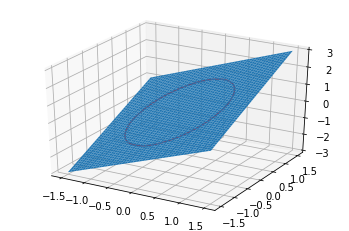

In [8]:
# Example source: http://kitchingroup.cheme.cmu.edu/blog/2013/02/03/Using-Lagrange-multipliers-in-optimization/
# Find the minimum (over x, y) of the function f(x,y), subject to g(x,y)=0, where f(x,y) = x+y and g(x,y) = x**2+y**2=1
import numpy as np

x = np.linspace(-1.5, 1.5) # Return evenly spaced numbers over a specified interval.ترجع أرقام بين رقمين وبينهما مسافات ثابتة


[X, Y] = np.meshgrid(x, x)# Return coordinate matrices from coordinate vectors.


import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot_surface(X, Y, X + Y)

theta = np.linspace(0,2*np.pi);
R = 1.0
x1 = R * np.cos(theta)
y1 = R * np.sin(theta)

ax.plot(x1, y1, x1 + y1, 'r-')

# To find the maximum, we construct the following function: Λ(x,y;λ)=f(x,y)+λg(x,y) where g(x,y)=x2+y2−1=0, which is the 
# constraint function. Since g(x,y)=0, we are not really changing the original function, provided that the constraint is met!

def func(X):
    x = X[0]
    y = X[1]
    L = X[2] # this is the multiplier. lambda is a reserved keyword in python
    return x + y + L * (x**2 + y**2 - 1) # Λ(x,y;λ)=f(x,y)+λg(x,y)

# The minima/maxima of the augmented function are located where all of the partial derivatives of the augmented function are 
# equal to zero, i.e. ∂Λ/∂x=0, ∂Λ/∂y=0, and ∂Λ/∂λ=0. the process for solving this is usually to analytically evaluate the 
# partial derivatives, and then solve the unconstrained resulting equations, which may be nonlinear.
# Rather than perform the analytical differentiation, here we develop a way to numerically approximate the partial derivatives.

def dfunc(X):
    dLambda = np.zeros(len(X))#Return a new array of given shape and type, filled with zeros.
    h = 1e-3 # this is the step size used in the finite difference.
    for i in range(len(X)):
        dX = np.zeros(len(X))
        dX[i] = h
        dLambda[i] = (func(X+dX)-func(X-dX))/(2*h);
    return dLambda

# The function we defined above (dfunc) will equal zero at a maximum or minimum. It turns out there are two solutions to 
# this problem, but only one of them is the maximum value. Which solution you get depends on the initial guess provided to the solver. 
# Here we have to use some judgement to identify the maximum.

from scipy.optimize import fsolve

# this is the max
X1 = fsolve(dfunc, [1, 1, 0])
print(X1, func(X1))

# this is the min
X2 = fsolve(dfunc, [-1, -1, 0])
print(X2, func(X2))

[[-1.         -1.        ]
 [ 2.31662479  5.63324958]
 [-4.31662479 -7.63324958]]


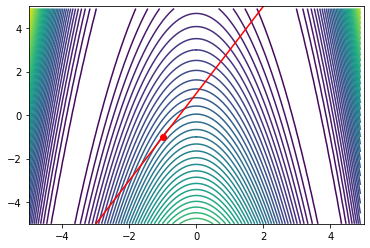

In [9]:
# example source:https://github.com/AtsushiSakai/PyOptSamples/blob/master/NonlinearOptimization/LagrangeMultiplierMethod/LagrangeMultiplierMethod.py

import matplotlib.pyplot as plt
import numpy as np
import random
from math import *

delta = 0.1
minXY = -5.0
maxXY = 5.0
nContour = 50


def dfunc(d):
    x = d[0]
    y = d[1]
    l = d[2]
    dx = -2 * l + 4 * x * (x ** 2 + y - 11)
    dy = l + 2 * x * x + 2 * y - 22
    dl = -2 * x + y - 1
    return [dx, dy, dl]


def SampleFunc(x, y):
    return (x ** 2 + y - 11) ** 2


def ConstrainFunction(x):
    return (2.0 * x + 1.0)


def CreateMeshData():
    x = np.arange(minXY, maxXY, delta)
    y = np.arange(minXY, maxXY, delta)
    X, Y = np.meshgrid(x, y)
    Z = [SampleFunc(ix, iy) for (ix, iy) in zip(X, Y)]
    return(X, Y, Z)


# Main
start = np.matrix([random.uniform(minXY, maxXY),
                   random.uniform(minXY, maxXY), 0])

(X, Y, Z) = CreateMeshData()
CS = plt.contour(X, Y, Z, nContour)

Xc = np.arange(minXY, maxXY, delta)
Yc = [ConstrainFunction(x) for x in Xc]

#  plt.plot(start[0,0],start[0,1],"xr");
plt.plot(Xc, Yc, "-r")

#  X1 = fsolve(dfunc, [-3, -3, 10])
#  print(X1)
#  print(dfunc(X1))

# the answer from sympy
result = np.matrix([
    [-1, -1],
    [-1 + sqrt(11), -1 + 2 * sqrt(11)],
    [-sqrt(11) - 1, -2 * sqrt(11) - 1]])
print(result)

plt.plot(result[:, 0], result[:, 1], "or")

plt.axis([minXY, maxXY, minXY, maxXY])
plt.show()

In [11]:
# constrained optimization example

# https://riptutorial.com/sympy/example/23277/constrained-non-linear-optimization
# Find the minimum (over x, y) of the function f(x,y), subject to g(x,y)=0, where f(x,y) = 2 * x**2 + 3 * y**2 & 
# g(x,y) = x**2 + y**2 - 4.

# Solution: We will solve this problem by performing the following steps:

#1- Specify the Lagrangian function for the problem
#2- Determine the Karush-Kuhn-Tucker (KKT) conditions (Karush–Kuhn–Tucker (KKT) conditions)
#3- Find the (x,y) tuples that satisfy the KKT conditions
#4- Determine which of these (x,y) tuples correspond to the minimum of f(x,y)

import sympy as sp
#x, y = sp.var('x,y',real=True);
x=Symbol('x')
f=Symbol('f')
g= Symbol('g')

f = 2 * x**2 + 3 * y**2
g = x**2 + y**2 - 4

# Next, define the Lagrangian function which includes a Lagrange multiplier lam corresponding to the constraint

lam = Symbol('lambda')
L = f - lam* g # 2 * x**2 + 3 * y**2 - lamba(x**2 + y**2 - 4)
print('The lagranian function is: ',L)

#Now, we can compute the set of equations corresponding to the KKT conditions.

gradL = [sp.diff(L,c) for c in [x,y]] # gradient of Lagrangian w.r.t. (x,y)
print(gradL)
KKT_eqs = gradL + [g]
KKT_eqs
print(KKT_eqs)

#The potential minimizers of f (given g=0) are obtained by solving the KKT_eqs equations overs x, y, lam:

stationary_points = sp.solve(KKT_eqs, [x, y, lam], dict=True) # solve the KKT equations
stationary_points 
print(stationary_points)

#Finally, check the objective function for each of the above points to determine the minimum

[f.subs(p) for p in stationary_points] # the constrained minimum of f equals 8 and is achieved at (x,y)=(-2,0) and (x,y)=(2,0)

The lagranian function is:  -lambda*(x**2 + y**2 - 4) + 2*x**2 + 3*y**2
[-2*lambda*x + 4*x, -2*lambda*y + 6*y]
[-2*lambda*x + 4*x, -2*lambda*y + 6*y, x**2 + y**2 - 4]
[{x: -2, y: 0, lambda: 2}, {x: 2, y: 0, lambda: 2}, {x: 0, y: -2, lambda: 3}, {x: 0, y: 2, lambda: 3}]
